In [1]:
# Translate "PlotAnalyticalModel_v2.m", Sam.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
cm = 1/2.54

$\tau_{2min} = \frac{f_{rupt}}{k\times V_{max}}$

$\tau = \frac{\tau_1}{\tau_{2min}}$ <br>

$f = \frac{f_{rupt}}{f_{stall}}$ <br>

$\gamma = \frac{1}{R_{temp}} - 1$

$\gamma_{crit} = (1 + \tau)^2\times \frac{f\times \tau}{2}$

$R_{crit} = \frac{1}{\gamma_{crit} + 1}$

$V_+ = \frac{1}{2}\times \frac{V_{max}}{\tau}\times (\tau - 1 + \sqrt{(1 - \tau)^2 + 4 \tau - 2 f \tau \gamma})$

$V_- = \frac{1}{2}\times \frac{V_{max}}{\tau}\times (\tau - 1 - \sqrt{(1 - \tau)^2 + 4 \tau - 2 f \tau \gamma})$

In [3]:
Vmax = 7;           # Maximum gliding speed (um/s)
k = 300.0;          # Spring constant (pN/um)
fstall = 0.4;       # Stall force (pN)
#frupt = 9.2;        # Rupture force (pN)

ActiveMotorRatio = []; Vplus = []; Vminus = []
R = []; Vp = []; Vm = []

for frupt in [2.0,4.0,6.0,8.0,9.2]:
    Tau1 = 0.025 # Binding period (s). 1/k_a See Ishigure & Nitta 2015 IEEE Trans. Nanobiosci.
    Tau2min = frupt/k/Vmax

    ActiveMotorRatioTemp = np.arange(0.01,1,0.0001) # 0.99

    Tau = Tau1/Tau2min
    f = frupt/fstall
    Gamma = 1.0/ActiveMotorRatioTemp - 1.0

    GammaCritical = ((1.0 + Tau)**2)/2.0/f/Tau
    ActiveMotorRatioCritical = 1.0/(GammaCritical + 1.0)

    #===================================================

    for I in range(len(Gamma)):
        if ActiveMotorRatioTemp[I] > ActiveMotorRatioCritical:
            ActiveMotorRatio.append( ActiveMotorRatioTemp[I] )
            Vplus.append( 0.5*Vmax/Tau*(Tau - 1.0 + np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f*Tau*Gamma[I])) )
            Vminus.append( 0.5*Vmax/Tau*(Tau - 1.0 - np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f*Tau*Gamma[I])) )
        elif ActiveMotorRatioTemp[I] < ActiveMotorRatioCritical:
            ActiveMotorRatio.append( ActiveMotorRatioTemp[I] )
            Vplus.append(0)
    R.append(ActiveMotorRatio)
    Vp.append(Vplus)
    Vm.append(Vminus)
    ActiveMotorRatio = []; Vplus = []; Vminus = []

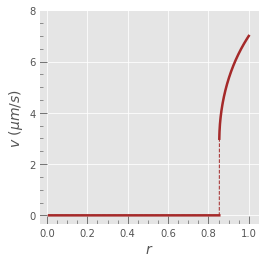

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(R[4][8438:],Vp[4][8438:], ls = '-', lw=2.5, color='brown', markerfacecolor='salmon') #  label='$f_{rupt}$ = %.1f pN'%-9.2,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')

ax.plot(R[4][:8438],Vp[4][:8438], ls = '-', lw=2.5, color='brown', markerfacecolor='salmon') #  label='$f_{rupt}$ = %.1f pN'%-9.2,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')

ax.plot(R[4],Vp[4], ls = '--', lw=1, color='brown', markerfacecolor='salmon') #  label='$f_{rupt}$ = %.1f pN'%-9.2,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')

# ax.axhline(y=0, color='k', lw=1)
# ax.axvline(x=0, color='k', lw=1)

ax.set_xticks(np.arange(0,1.1,0.2))
ax.set_yticks(np.arange(0,9,2))
ax.set_xlabel('$r$', fontsize=14) # _{substrate}
ax.set_ylabel('$v\ (\mu m/s)$', fontsize=14)

ax.minorticks_on()
ax.tick_params(direction='in', length=8, which = 'major')
ax.tick_params(direction='in', length=4, which = 'minor')

#ax.legend(loc='lower left')

#plt.savefig('fig/gldn_spd.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/gldn_spd.png', format='png', dpi=700, bbox_inches='tight')

# plt.savefig('fig/gldn_spd.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('fig/gldn_spd.svg', format='svg', bbox_inches='tight')

plt.show()

In [35]:
Vp[4][8438:]#[85:]

[2.9899956550031925,
 3.04229849028947,
 3.0809923655091844,
 3.1131628455841174,
 3.141294613166073,
 3.1666079007974695,
 3.189809587516285,
 3.2113526687275833,
 3.231548101506805,
 3.250620295665688,
 3.26873749902277,
 3.286029704308575,
 3.3025998221891073,
 3.318530978842515,
 3.3338914644448883,
 3.3487381955674898,
 3.3631192030828325,
 3.377075461209166,
 3.3906422591796224,
 3.4038502480144253,
 3.416726251780169,
 3.429293905034419,
 3.4415741599154988,
 3.453585694050415,
 3.465345242008806,
 3.476867867120575,
 3.4881671862704864,
 3.499255557245786,
 3.5101442359908366,
 3.5208435094735986,
 3.531362808634124,
 3.5417108049470483,
 3.5518954934135327,
 3.5619242642432623,
 3.5718039650553295,
 3.5815409550871298,
 3.5911411526315993,
 3.600610076709145,
 3.6099528838078814,
 3.6191744003877786,
 3.6282791517304416,
 3.6372713876248532,
 3.6461551053028356,
 3.6549340699761,
 3.6636118332744636,
 3.6721917498413887,
 3.6806769923074047,
 3.689070564830878,
 3.697375315370

In [12]:
import subprocess
subprocess.call('inkscape fig/gldn_spd.svg -M fig/gldn_spd.emf', shell=True)

0

In [36]:
R[4][8438:]

[0.8537999999999949,
 0.8538999999999949,
 0.8539999999999949,
 0.8540999999999949,
 0.8541999999999949,
 0.854299999999995,
 0.8543999999999949,
 0.8544999999999949,
 0.8545999999999949,
 0.8546999999999949,
 0.8547999999999949,
 0.8548999999999949,
 0.8549999999999949,
 0.8550999999999949,
 0.8551999999999949,
 0.8552999999999948,
 0.8553999999999949,
 0.8554999999999949,
 0.8555999999999949,
 0.8556999999999949,
 0.8557999999999949,
 0.8558999999999949,
 0.8559999999999949,
 0.8560999999999949,
 0.8561999999999949,
 0.8562999999999948,
 0.8563999999999949,
 0.8564999999999949,
 0.8565999999999949,
 0.8566999999999949,
 0.8567999999999949,
 0.8568999999999949,
 0.8569999999999949,
 0.8570999999999949,
 0.8571999999999949,
 0.8572999999999948,
 0.8573999999999948,
 0.8574999999999949,
 0.8575999999999949,
 0.8576999999999949,
 0.8577999999999949,
 0.8578999999999949,
 0.8579999999999949,
 0.8580999999999949,
 0.8581999999999949,
 0.8582999999999948,
 0.8583999999999948,
 0.85849999999

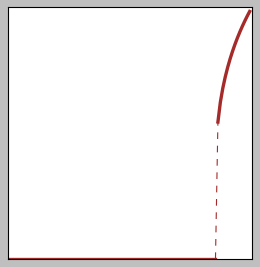

In [11]:
plt.style.use('classic')

fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(R[4][85:],Vp[4][85:], ls = '-', lw=3, color='brown', markerfacecolor='salmon') #  label='$f_{rupt}$ = %.1f pN'%-9.2,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')

ax.plot(R[4][:85],Vp[4][:85], ls = '-', lw=3, color='brown', markerfacecolor='salmon') #  label='$f_{rupt}$ = %.1f pN'%-9.2,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')

ax.plot(R[4][84:86],Vp[4][84:86], ls = '--', lw=1, color='brown', markerfacecolor='salmon') #  label='$f_{rupt}$ = %.1f pN'%-9.2,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')

# ax.axhline(y=0, color='k', lw=1)
# ax.axvline(x=0, color='k', lw=1)

ax.set_xticks([])#np.arange(0,1.1,0.2))
ax.set_yticks([])#np.arange(0,9,2))
#ax.set_xlabel('$r$', fontsize=20) # _{substrate}
#ax.set_ylabel('$v$', fontsize=20)

ax.minorticks_on()
ax.tick_params(direction='in', length=8, which = 'major')
ax.tick_params(direction='in', length=4, which = 'minor')



#ax.legend(loc='lower left')

#plt.savefig('fig/gldn_spd.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/gldn_spd.png', format='png', dpi=700, bbox_inches='tight')

# plt.savefig('fig/gldn_spd-sketch.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('fig/gldn_spd-sketch.svg', format='svg', bbox_inches='tight')

plt.show()

In [10]:
import subprocess
subprocess.call('inkscape fig/gldn_spd-sketch.svg -M fig/gldn_spd-sketch.emf', shell=True)

0

In [5]:
act_dta = pd.DataFrame({'r':R[4],'v':Vp[4]})
act_dta.to_csv('act_data.csv', index = False)

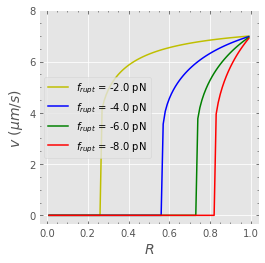

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(R[0],Vp[0], 'y-', label='$f_{rupt}$ = %.1f pN'%-2.0)
ax.plot(R[1],Vp[1], 'b-', label='$f_{rupt}$ = %.1f pN'%-4.0)
ax.plot(R[2],Vp[2], 'g-', label='$f_{rupt}$ = %.1f pN'%-6.0)
ax.plot(R[3],Vp[3], 'r-', label='$f_{rupt}$ = %.1f pN'%-8.0)

ax.set_xticks(np.arange(0,1.1,0.2))
ax.set_yticks(np.arange(0,9,2))
ax.set_xlabel('$R$', fontsize=14)
ax.set_ylabel('$v\ (\mu m/s)$', fontsize=14)
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.minorticks_on()
ax.legend()

#plt.savefig('fig/gldn_spds.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/gldn_spds.png', format='png', dpi=700, bbox_inches='tight')
plt.show()